# Plot(s) for a January Talk

Despite their intended short-term use, these will be a good starting point for paper figures.

## Experimental design

We suspect mutant (DEE/DEE) genes in mice are expressed in retinal angiogenesis.

Given a number of litters, $N$, we look at two(/three) animals per litter
- one mutant
- one wild type
- (one heterozygous)

** The experiment design demands a paired (dependent) t-test.**

## Image selection

Since hyaloid vessels were present in certain regions and would present as a nuisance parameter, vessels were imaged in sections. Images without hyaloid vessels were selected for analysis. 

## Measurables

We looked at the following parameters using AngioTool

- vessels percentage area (vessel density)
- total number of junctions (switching to junctions density)
- total vessels length
- total number of end points

### Load data

In [1]:
import numpy as np
import pandas as pd

unblinded_file = '../data/unblinded_data.csv'
df = pd.read_csv(unblinded_file)

df.head()

,Vessels percentage area,Total Number of Junctions,Total Vessels Length,Total Number of End Points,Litter,AnimalID,Genotype
0,65.034,119,14.215,16,35,35-3,+/+
1,61.498,183,16.877,17,35,35-3,+/+
2,55.247,157,15.501,29,35,35-3,+/+
3,55.219,138,14.466,37,35,35-5,DEE/DEE
4,51.731,134,13.181,32,35,35-5,DEE/DEE


### Average over litter and genotype

In [2]:
data_mean = (df
             .set_index(['Litter', 'Genotype']) # pivot
             .sort_index(level = ['Litter', 'Genotype'])
             .mean(level = ['Litter', 'Genotype'])
            )

pd.options.display.float_format = '{:,.3f}'.format
data_mean

Vessels percentage area  Total Number of Junctions  \
Litter Genotype                                                       
35     +/+                        60.593                    153.000   
       DEE/DEE                    53.619                    132.333   
36     +/+                        64.299                    171.667   
       DEE/DEE                    62.152                    136.833   
37     +/+                        58.682                    110.000   
       DEE/+                      61.730                    161.000   
       DEE/DEE                    54.292                     98.333   
39     +/+                        56.755                    163.400   
       DEE/+                      55.086                    119.667   
       DEE/DEE                    50.380                    118.400   
40     +/+                        55.956                    177.000   
       DEE/+                      51.474                    111.250   
       DEE/DEE                    51.083                    116.400   
41     +/+                        49.744                    106.200   
       DEE/DEE                    49.865                     91.333   

                 Total Vessels Length  Total Number of End Points  
Litter Genotype                                                    
35     +/+                     15.531                      20.667  
       DEE/DEE                 13.567                      38.667  
36     +/+                     16.086                      26.333  
       DEE/DEE                 14.415                      31.167  
37     +/+                     13.102                      25.333  
       DEE/+                   15.673                      32.500  
       DEE/DEE                 12.666                      27.667  
39     +/+                     15.477                      52.200  
       DEE/+                   13.479                      36.500  
       DEE/DEE                 12.999                      45.800  
40     +/+                     16.085                      46.833  
       DEE/+                   12.848                      32.250  
       DEE/DEE                 13.234                      34.200  
41     +/+                     11.684                      39.800  
       DEE/DEE                 11.324                      40.667

In [3]:
wild =   data_mean.xs('+/+',     level = 'Genotype')
mutant = data_mean.xs('DEE/DEE', level = 'Genotype')

data_mean = data_mean.reset_index(0).reset_index()

In [4]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns

sns.set(style="white", color_codes=True)
sns.set_context("talk")

### Difference between wild and mutant

i.e. a positive value here means the mutant was deficient


In [5]:
pd.options.display.float_format = '{:,.2f}'.format

diff = wild - mutant
diff

,Vessels percentage area,Total Number of Junctions,Total Vessels Length,Total Number of End Points
Litter,,,,
35,6.97,20.67,1.96,-18.00
36,2.15,34.83,1.67,-4.83
37,4.39,11.67,0.44,-2.33
39,6.37,45.00,2.48,6.40
40,4.87,60.60,2.85,12.63
41,-0.12,14.87,0.36,-0.87


### Ratio between mutant and wild

In [6]:
normdata = ((mutant / wild.values * 100)
            .rename(
                columns={
                    'Vessels percentage area':'Vessels Density',
                    'Total Number of Junctions':'Number of Junctions',
                    'Total Vessels Length':'Vessels Length',
                    'Total Number of End Points':'Number of End Points'}
                    )
            )

normdata = normdata[['Vessels Density','Number of Junctions', 'Vessels Length']]
pd.options.display.float_format = '{:,.2f}'.format

normdata

,Vessels Density,Number of Junctions,Vessels Length
Litter,,,
35,88.49,86.49,87.36
36,96.66,79.71,89.62
37,92.52,89.39,96.67
39,88.77,72.46,83.99
40,91.29,65.76,82.27
41,100.24,86.00,96.92


## Merge with outgrowth data

In [7]:
data = pd.read_csv("../data/UnblindedOutgrowthData.csv",
                   usecols=['Genotype', 'ID', 'Mean']
                  )


# We want to group by litter, so we need to add a litter column
data['Litter'] = [x[:2] for x in data['ID']]


data.replace(to_replace=['DD','DP','PP'],
             value=['DEE/DEE', 'DEE/+','+/+'],
             inplace=True)

data_mean = (data
             .set_index(['Litter','Genotype'])
             .sort_index(level=['Litter','Genotype'])
             .mean(level=['Litter', 'Genotype'])
            )

wild =   data_mean.xs('+/+',     level = 'Genotype')
hetero = data_mean.xs('DEE/+',   level = 'Genotype')
mutant = data_mean.xs('DEE/DEE', level = 'Genotype')

## Not very idiomatic to Pandas, but it works fine for now
het_and_wild_litters = list(set(hetero.index.values) & set(wild.index.values))
mut_and_wild_litters = list(set(mutant.index.values) & set(wild.index.values))

normdata_mut = (mutant.loc[mut_and_wild_litters] / wild.loc[mut_and_wild_litters]
                * 100)

normdata_mut.rename(index=str, columns={'Mean':'Outgrowth Length'},
                    inplace=True)
#normdata_mut

In [8]:
frames = [normdata, normdata_mut]
result = pd.concat(frames)
result

,Number of Junctions,Outgrowth Length,Vessels Density,Vessels Length
Litter,,,,
35,86.49,nan,88.49,87.36
36,79.71,nan,96.66,89.62
37,89.39,nan,92.52,96.67
39,72.46,nan,88.77,83.99
40,65.76,nan,91.29,82.27
41,86.00,nan,100.24,96.92
20,nan,115.57,nan,nan
28,nan,87.91,nan,nan
31,nan,105.00,nan,nan


## Plot

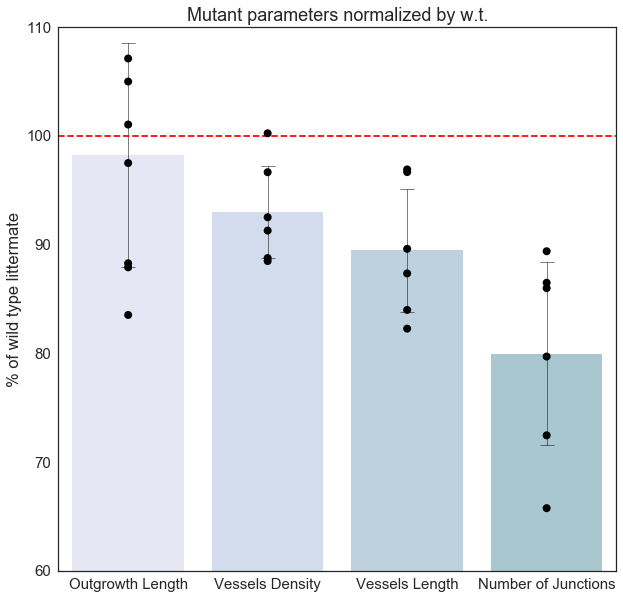

In [9]:
import itertools
#sns.set_style("ticks")
sns.set_style("white")

bar_palette = sns.cubehelix_palette(4,
                                    start = 0.5,
                                    rot =  0.9,
                                    dark = 0.75,
                                    light = 0.9)

plot_order = ['Outgrowth Length', 'Vessels Density',
              'Vessels Length', 'Number of Junctions']

with sns.plotting_context("notebook", font_scale = 1.5):
    fig, ax = plt.subplots(figsize = (10, 10))
    
    normplot = sns.barplot(data = result,
                           ci = 'sd',
                           palette = bar_palette,
                           errcolor = 'black',
                           errwidth = 0.5,
                           order = plot_order,
                           #errcolor = sns.xkcd_rgb['dark teal'],
                           capsize = 0.1
                          )
    
    sns.stripplot(data = result,
                  color = sns.xkcd_rgb["black"],
                  #edgecolor='black',
                  size = 8,
                  alpha = 1,
                  order = plot_order,
                 )
    
    ax.set_ylabel('% of wild type littermate')
    ax.set_ylim([60, 110])
    ax.axhline(100, color = 'red', linestyle = '--')
    ax.set_title('Mutant parameters normalized by w.t.')
